# Interactions

Interaction terms are statistical tools that lets your model express what happens if two features appear together in the same row.

$\beta_1x_1 + \beta_2x_2 + \beta_3(x_1x_2)$

Given a model $\beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$, the resulting interactions are:

$\beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \beta_{n+1}(x_1x_2) + ... + \beta_i(x_{n-1}x_n)$, where $i = \frac{n(n+1)}{2}$ is the number of resulting features.

Plotting interactions as a function of features

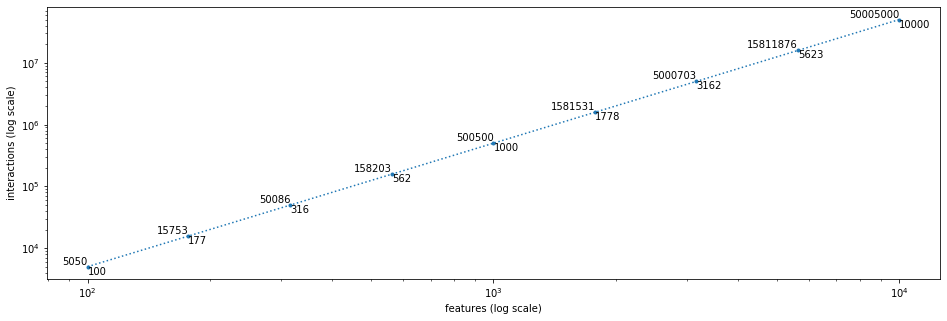

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def plot_interactions(x):
    interactions = (x * (x + 1) / 2).astype('int64')
    plt.figure(figsize=(16,5))
    plt.loglog(x, interactions, marker='.', linestyle='dotted')
    for i,j in zip(x, interactions):
        plt.text(i,j,j, horizontalalignment='right', verticalalignment='bottom')
        plt.text(i,j,i, horizontalalignment='left', verticalalignment='top')
    plt.xlabel('features (log scale)')
    plt.ylabel('interactions (log scale)')
    
plot_interactions(np.logspace(2, 4, 9, dtype='int'))    
plt.show()

# $p > n$ problem

The problem with more predictors than cases, usually indicated as "$p>n$", is that there is no unique solution to a standard linear regression problem. If rows of the matrix of data points represent cases and columns represent predictors, there are necessarily linear dependences among the columns of the matrix. So once you've found coefficients for $n$ of the predictors, the coefficients for the other ($p−n$) predictors can be expressed as arbitrary linear combinations of those first $n$ predictors.

The impact of dataset size and data features, [ISLR (page 203, prediction accuracy)](http://faculty.marshall.usc.edu/gareth-james/ISL/):

$n$ is much larger than $p$:
>In this case, the least squares estimates tend to also have low variance, and hence will perform well on test observations.

$n$ is not much larger than $p$:
>There can be a lot of variability in the least squares fit, resulting in overfitting and consequently poor predictions on future observations not used in model training

$p$ is larger than $n$:
>There is no longer a unique least squares coefficient estimate: the variance is infinite so the method cannot be used at all.

$$max\ features = \frac{\sqrt{8 \times observations + 1} -1 }{2}$$

In [12]:
n=400277

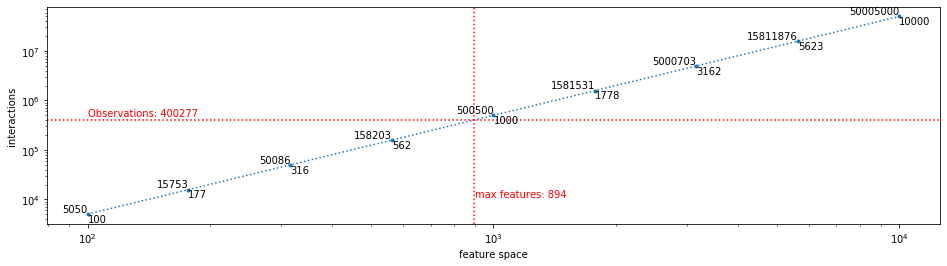

In [19]:
import matplotlib.pyplot as plt
import numpy as np
feature_space = np.logspace(2, 4, 9, dtype='int')
interactions = (feature_space * (feature_space + 1) / 2).astype('int64')

plt.figure(figsize=(16,4))
plt.loglog(feature_space, interactions, marker='.', linestyle='dotted')

plt.axhline(n, linestyle='dotted', color='red')
plt.text(x=100, y=n*1.1, s='Observations: {}'.format(n),
         verticalalignment='bottom', color='red')
max_features = int((np.sqrt(8 * n + 1) - 1) / 2)
plt.axvline(max_features , linestyle='dotted', color='red')
plt.text(x=max_features*1.01, y=10**4, s='max features: {}'.format(max_features), verticalalignment='bottom', color='red')
for i,j in zip(feature_space, interactions):
    plt.text(i,j,j, horizontalalignment='right', verticalalignment='bottom')
    plt.text(i,j,i, horizontalalignment='left', verticalalignment='top')
plt.xlabel('feature space')
plt.ylabel('interactions')
plt.show()

In [14]:
max_features * (max_features+1) /2

400065.0

In [15]:
(max_features-1) * (max_features) /2

399171.0